In [24]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


df = pd.read_csv("RESULTS_NSTEVENS_TotalUnitCount=384583_2025-01-16.csv")

# Split the data into chunks of 36 rows and pivot into columns
chunks = [df[i:i+36] for i in range(0, len(df), 36)]
pivot_data = {}

for chunk in chunks:
    df_chunk = pd.DataFrame(chunk, columns=["PrevLength","MatchScore","TileSize","PrevType", "BrowseTime"])
    column_name = f"PL{df_chunk['TileSize'].iloc[0]}_MS{df_chunk['MatchScore'].iloc[0]}_TS{df_chunk['PrevLength'].iloc[0]}_PT{df_chunk['PrevType'].iloc[0]}"
    pivot_data[column_name] = df_chunk["BrowseTime"].tolist()

# Create the final pivoted DataFrame
df_pivoted = pd.DataFrame(pivot_data)

print(df_pivoted)

# # Plot
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Browse.Time'], bins=50, kde=True)
# plt.title('Distribution of Browse Times')
# plt.xlabel('Browse Time')
# plt.ylabel('Frequency')
# plt.show()

    PL30_MS60_TS0.1_PTTT  PL30_MS60_TS0.1_PTAC  PL45_MS60_TS0.1_PTTT  \
0              20.676849             24.600627             16.776612   
1              20.092899             25.729166             17.067161   
2              21.683781             25.500671             17.517951   
3              20.357003             23.997115             17.156862   
4              21.871196             24.407942             16.399333   
5              19.961416             25.723250             18.355370   
6              20.271189             24.679919             18.753797   
7              18.438421             25.391104             17.311217   
8              21.212933             26.554132             16.855650   
9              21.116766             24.469788             17.948167   
10             20.050634             25.439214             16.855233   
11             20.794750             26.029653             18.590540   
12             22.186291             24.833863             18.01

In [25]:
means = {}

for i,v in enumerate(df_pivoted.columns):
    means[df_pivoted[v].mean()] = i


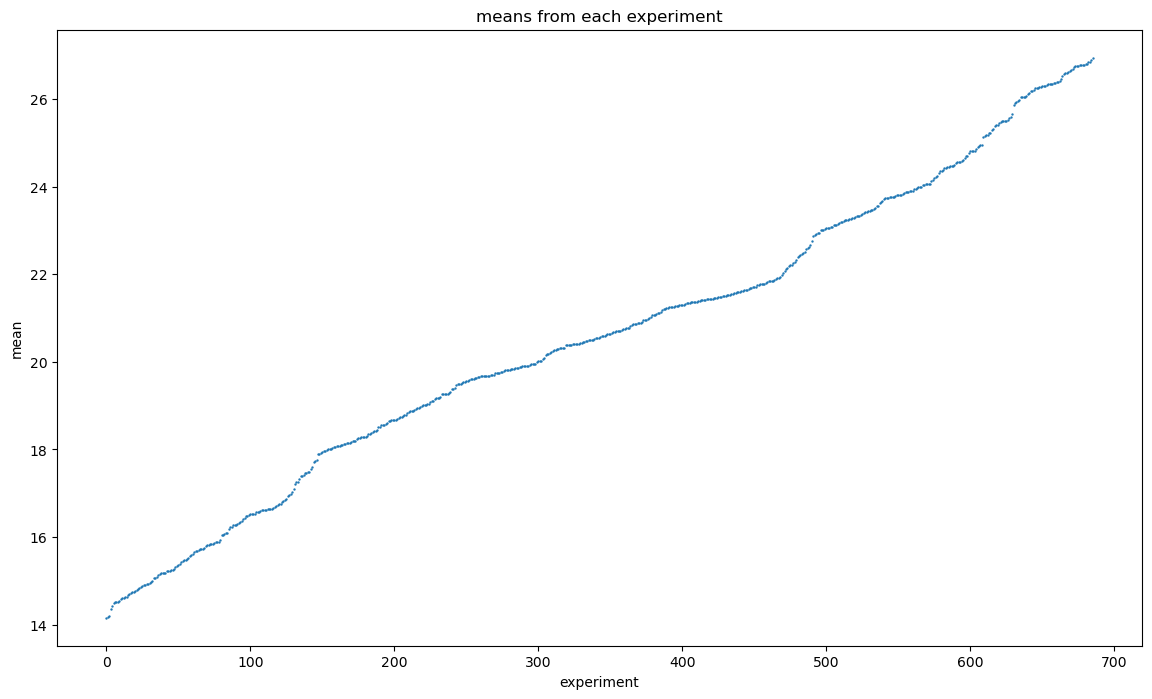

In [26]:
import numpy as np
sorted_means = sorted(means)
plt.figure(figsize=(14, 8))
plt.scatter(x=np.arange(0,len(sorted_means)),y=sorted_means, s=0.5)
plt.xlabel("experiment")
plt.ylabel("mean")
plt.title("means from each experiment")
plt.show()

['PL60_MS80_TS0.3_PTTT', 'PL60_MS73_TS0.233333333333333_PTTT', 'PL60_MS80_TS0.166666666666667_PTTT']


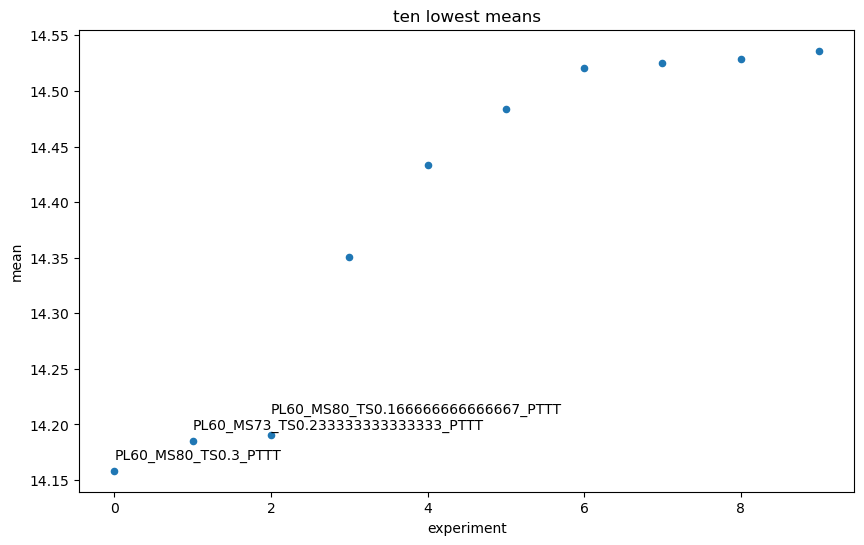

In [27]:
import numpy as np
sorted_means = sorted(means)

bottom_three = sorted_means[0:3]
titles = []
for i in bottom_three:
    titles.append(df_pivoted.iloc[:, means[i]].name)
print(titles)


plt.figure(figsize=(10, 6))
plt.scatter(x=np.arange(0,10),y=sorted_means[0:10], s=20)
for i in range(3):
    if i == 2:
        plt.text(x=i,y=bottom_three[i]+0.02,s=titles[i])
    else:
        plt.text(x=i,y=bottom_three[i]+0.01,s=titles[i])

plt.xlabel("experiment")
plt.ylabel("mean")
plt.title("ten lowest means")
plt.show()

In [28]:
print(means[min(means)])

340


In [29]:
column_340 = df_pivoted.iloc[:, 340]
print(column_340)

0     15.046412
1     13.427818
2     13.905169
3     13.075152
4     16.503770
5     13.198295
6     15.615913
7     13.810288
8     12.441618
9     12.961167
10    15.430202
11    15.676386
12    14.201250
13    14.735207
14    14.311836
15    13.702506
16    14.837692
17    15.087946
18    12.665180
19    14.742140
20    14.815381
21    14.004125
22    12.735544
23    13.925796
24    11.859896
25    14.206346
26    14.055218
27    14.676989
28    14.640217
29    13.051042
30    14.206795
31    13.925122
32    15.517113
33    14.638138
34    13.075741
35    14.991429
Name: PL60_MS80_TS0.3_PTTT, dtype: float64


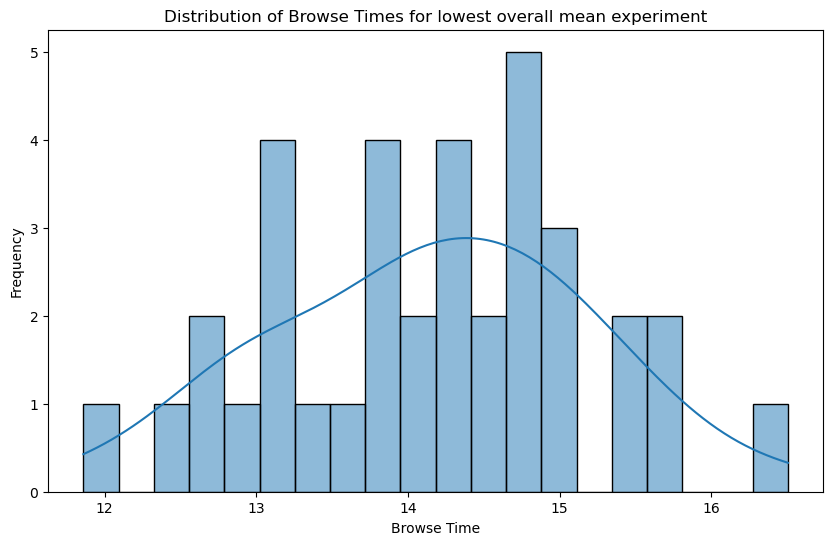

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(column_340, bins=20, kde=True)
plt.title('Distribution of Browse Times for lowest overall mean experiment')
plt.xlabel('Browse Time')
plt.ylabel('Frequency')
plt.show()

# Plots

### Main effects plots

In [31]:
tile_size = df["PrevLength"].unique()
match_score = df["MatchScore"].unique()
prev_length = df["TileSize"].unique()
prev_type = df["PrevType"].unique()

In [32]:
import pandas as pd

# Combine relevant columns into a single 'Condition' column
df['Condition'] = df['PrevLength'].astype(str) + "TS_" + \
                  df['MatchScore'].astype(str) + "MS_" + \
                  df['TileSize'].astype(str) + "PL_" + \
                  df['PrevType']

# Group by the new 'Condition' column
summary_df = df.groupby('Condition').agg(
    sample_size=('BrowseTime', 'size'),
    mean_browse_time=('BrowseTime', 'mean')
).reset_index()

# Rename columns to match the format
summary_df.rename(columns={'mean_browse_time': 'mean browse time (MOI)'}, inplace=True)

# Display the transformed dataframe
print(summary_df)

                              Condition  sample_size  mean browse time (MOI)
0    0.166666666666667TS_100MS_105PL_AC           36               25.385060
1    0.166666666666667TS_100MS_105PL_TT           36               20.829760
2    0.166666666666667TS_100MS_120PL_AC           36               26.743145
3    0.166666666666667TS_100MS_120PL_TT           36               21.548346
4     0.166666666666667TS_100MS_30PL_AC           36               24.806562
..                                  ...          ...                     ...
681                  0.5TS_93MS_60PL_TT           36               16.328570
682                  0.5TS_93MS_75PL_AC           36               21.915167
683                  0.5TS_93MS_75PL_TT           36               16.268829
684                  0.5TS_93MS_90PL_AC           36               23.439843
685                  0.5TS_93MS_90PL_TT           36               18.230704

[686 rows x 3 columns]


In [33]:
summary_df[summary_df["mean browse time (MOI)"] == min(summary_df["mean browse time (MOI)"])]

,Condition,sample_size,mean browse time (MOI)
457,0.3TS_80MS_60PL_TT,36,14.158357


In [34]:
# Tile size

tile_size_means = {}
for i in tile_size:
    tile_size_means[f"{i}TS_"] = summary_df[summary_df["Condition"].apply(lambda x: f"{i}TS_" in x)]["mean browse time (MOI)"].mean()
print(tile_size_means)

{'0.1TS_': 20.579089436548227, '0.166666666666667TS_': 20.577429461612308, '0.233333333333333TS_': 20.595469775621314, '0.3TS_': 20.570943933896103, '0.366666666666667TS_': 20.59969769339477, '0.433333333333333TS_': 20.571850183662693, '0.5TS_': 20.578794005873995}


In [35]:
# Match score

match_score_means = {}
for i in match_score:
    match_score_means[f"{i}MS_"] = summary_df[summary_df["Condition"].apply(lambda x: f"{i}MS_" in x)]["mean browse time (MOI)"].mean()
print(match_score_means)

{'60MS_': 21.238508007336044, '66MS_': 20.6654652092646, '73MS_': 19.9045127903108, '80MS_': 19.665843044232478, '86MS_': 19.884711722241732, '93MS_': 20.75936963532323, '100MS_': 21.954864081900528}


In [36]:
# Prev Length

prev_length_means = {}
for i in prev_length:
    prev_length_means[f"{i}PL_"] = summary_df[summary_df["Condition"].apply(lambda x: f"{i}PL_" in x)]["mean browse time (MOI)"].mean()
print(prev_length_means)

{'30PL_': 21.56646013163897, '45PL_': 19.222315015001985, '60PL_': 18.015761225137698, '75PL_': 18.565788854383108, '90PL_': 20.285616333395318, '105PL_': 22.440571279506948, '120PL_': 23.976761651545388}


In [37]:
# Prev type

prev_type_means = {}
for i in prev_type:
    prev_type_means[f"{i}"] = summary_df[summary_df["Condition"].apply(lambda x: f"{i}" in x)]["mean browse time (MOI)"].mean()
print(prev_type_means)

{'TT': 18.09146906171776, 'AC': 23.07232364988493}


In [38]:
level = []
for key,val in tile_size_means.items():
    level.append(key)
    
for key,val in match_score_means.items():
    level.append(key)
    
    
for key,val in prev_length_means.items():
    level.append(key)
    
    
for key,val in prev_type_means.items():
    level.append(key)

In [39]:
response = []
for key,val in tile_size_means.items():
    response.append(val)
    
for key,val in match_score_means.items():
    response.append(val)
    
for key,val in prev_length_means.items():
    response.append(val)
    
for key,val in prev_type_means.items():
    response.append(val)

In [40]:
factor = ["TileSize", "TileSize", "TileSize", "TileSize", "TileSize", "TileSize", "TileSize",
               "MatchScore", "MatchScore","MatchScore","MatchScore","MatchScore","MatchScore","MatchScore",
               "PrevLength","PrevLength","PrevLength","PrevLength","PrevLength","PrevLength","PrevLength",
               "PrevType","PrevType"]

In [41]:
print(len(level))

23


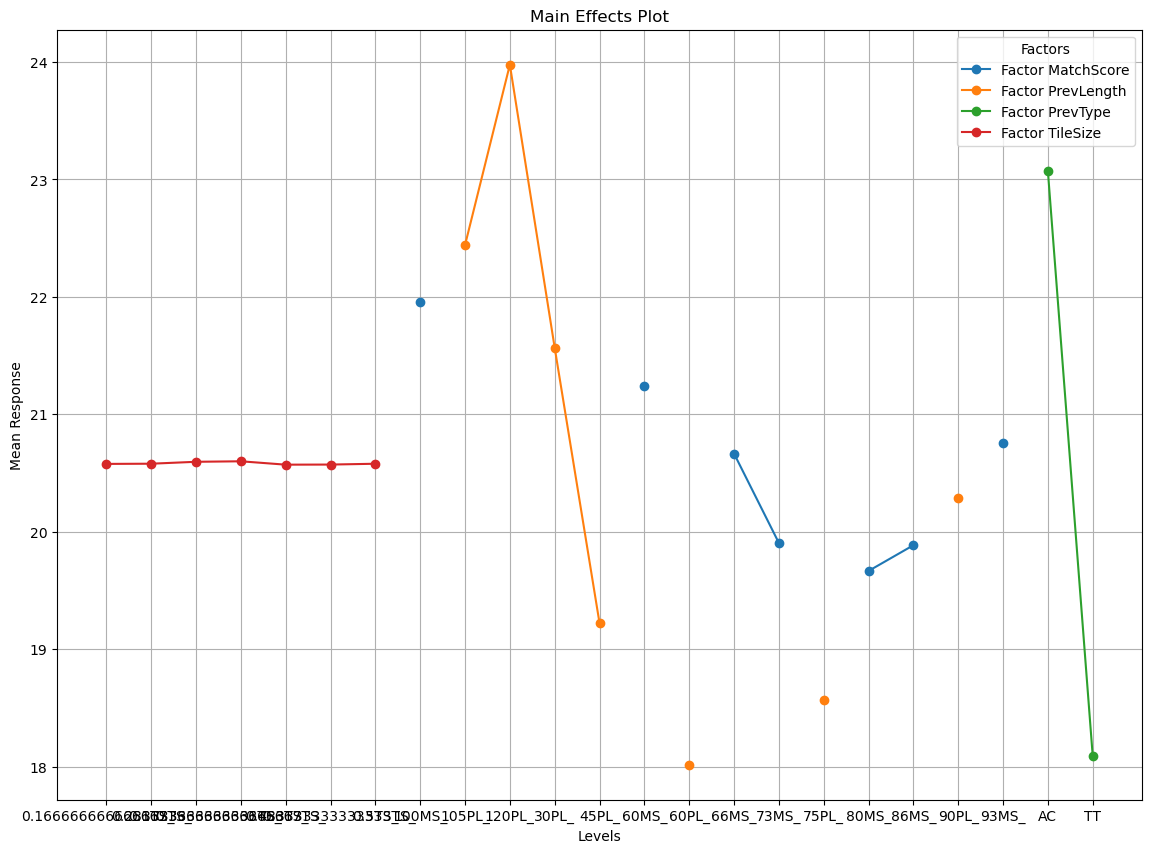

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataframe (replace this with your actual data)
data = {
    "Factor": factor,
    "Level": level,
    "Response": response,
}
df_1 = pd.DataFrame(data)

# Calculate the mean response for each factor level
mean_response = df_1.groupby(["Factor", "Level"])["Response"].mean().reset_index()

# Pivot the dataframe for plotting
pivot = mean_response.pivot(index="Level", columns="Factor", values="Response")

# Plot main effects
plt.figure(figsize=(14, 10))
for column in pivot.columns:
    plt.plot(pivot.index, pivot[column], marker='o', label=f"Factor {column}")

plt.title("Main Effects Plot")
plt.xlabel("Levels")
plt.ylabel("Mean Response")
plt.legend(title="Factors")
plt.grid()
plt.show()

In [43]:
df

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime,Condition
0,0.1,60,30,TT,20.676849,0.1TS_60MS_30PL_TT
1,0.1,60,30,TT,20.092899,0.1TS_60MS_30PL_TT
2,0.1,60,30,TT,21.683781,0.1TS_60MS_30PL_TT
3,0.1,60,30,TT,20.357003,0.1TS_60MS_30PL_TT
4,0.1,60,30,TT,21.871196,0.1TS_60MS_30PL_TT
...,...,...,...,...,...,...
24691,0.5,100,120,AC,27.379330,0.5TS_100MS_120PL_AC
24692,0.5,100,120,AC,26.256409,0.5TS_100MS_120PL_AC
24693,0.5,100,120,AC,29.626703,0.5TS_100MS_120PL_AC
24694,0.5,100,120,AC,27.398466,0.5TS_100MS_120PL_AC


<Figure size 1400x1000 with 0 Axes>

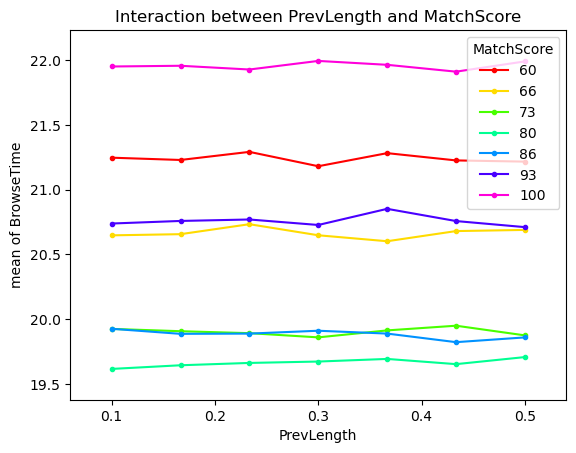

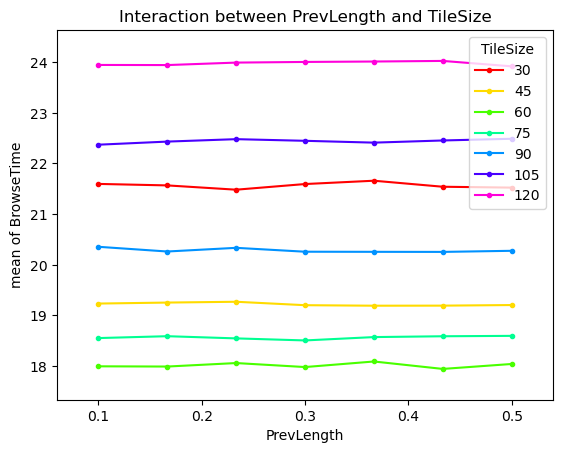

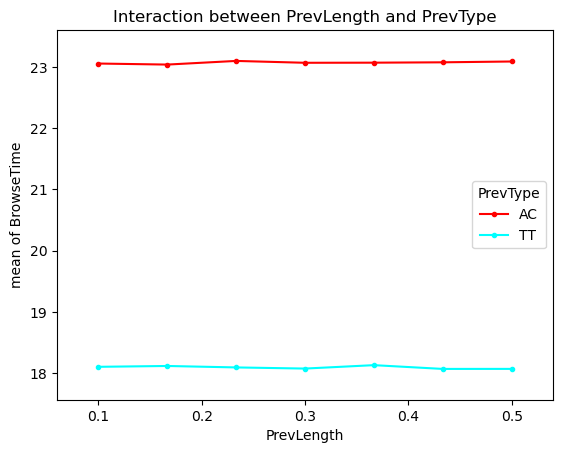

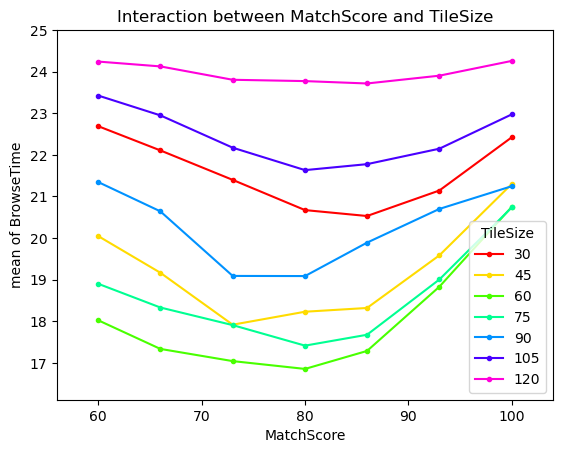

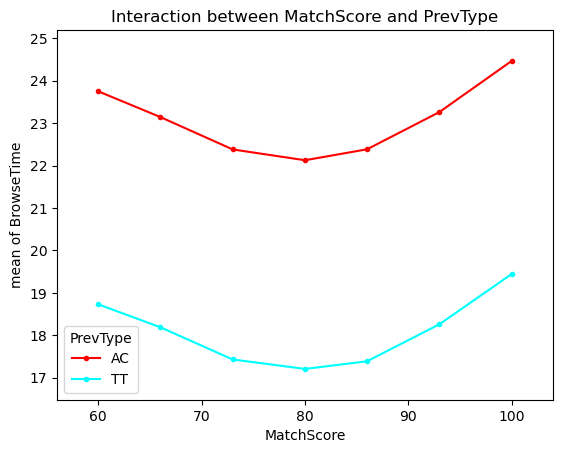

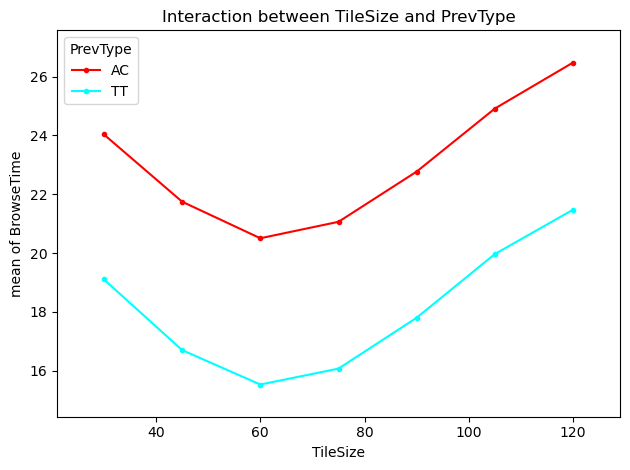

In [47]:
from statsmodels.graphics.factorplots import interaction_plot

# Create interaction plots for each pair of factors
plt.figure(figsize=(14, 10))

# Interaction between PrevLength and MatchScore
interaction_plot(df['PrevLength'], df['MatchScore'], df['BrowseTime'])
plt.title('Interaction between PrevLength and MatchScore')

# Interaction between PrevLength and TileSize
interaction_plot(df['PrevLength'], df['TileSize'], df['BrowseTime'])
plt.title('Interaction between PrevLength and TileSize')

# Interaction between PrevLength and PrevType
interaction_plot(df['PrevLength'], df['PrevType'], df['BrowseTime'])
plt.title('Interaction between PrevLength and PrevType')

# Interaction between MatchScore and TileSize
interaction_plot(df['MatchScore'], df['TileSize'], df['BrowseTime'])
plt.title('Interaction between MatchScore and TileSize')

# Interaction between MatchScore and PrevType
interaction_plot(df['MatchScore'], df['PrevType'], df['BrowseTime'])
plt.title('Interaction between MatchScore and PrevType')

# Interaction between TileSize and PrevType
interaction_plot(df['TileSize'], df['PrevType'], df['BrowseTime'])
plt.title('Interaction between TileSize and PrevType')

plt.tight_layout()
plt.show()

# Regression

In [247]:
df_pivoted.shape

(36, 686)

In [248]:
last_column = df_pivoted.iloc[:, 685]
print(last_column.name)

PL120_MS100_TS0.5_PTAC


In [249]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [50]:
df

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime,Condition
0,0.1,60,30,TT,20.676849,0.1TS_60MS_30PL_TT
1,0.1,60,30,TT,20.092899,0.1TS_60MS_30PL_TT
2,0.1,60,30,TT,21.683781,0.1TS_60MS_30PL_TT
3,0.1,60,30,TT,20.357003,0.1TS_60MS_30PL_TT
4,0.1,60,30,TT,21.871196,0.1TS_60MS_30PL_TT
...,...,...,...,...,...,...
24691,0.5,100,120,AC,27.379330,0.5TS_100MS_120PL_AC
24692,0.5,100,120,AC,26.256409,0.5TS_100MS_120PL_AC
24693,0.5,100,120,AC,29.626703,0.5TS_100MS_120PL_AC
24694,0.5,100,120,AC,27.398466,0.5TS_100MS_120PL_AC


In [250]:
# Full interaction model (four factor (1))

one = smf.ols('BrowseTime ~ C(PrevLength) * C(MatchScore) * C(TileSize) * C(PrevType)', data = df).fit()
one.summary()

PatsyError: Error evaluating factor: NameError: name 'BrowseTime' is not defined
    BrowseTime ~ C(PrevLength) * C(MatchScore) * C(TileSize) * C(PrevType)
    ^^^^^^^^^^

In [ ]:
# reduced interaction model
one_pfive = smf.ols('BrowseTime ~ C(PrevLength) * C(MatchScore) * C(TileSize) * C(PrevType)', data = df).fit()
one_pfive.summary()

In [ ]:
# three factor interaction models (4)

two = smf.ols('BrowseTime ~ C(PrevLength) * C(MatchScore) * C(TileSize)', data = df).fit()
two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     48.70
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:23   Log-Likelihood:                -59395.
No. Observations:               24696   AIC:                         1.195e+05
Df Residuals:                   24353   BIC:                         1.223e+05
Df Model:                         342                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     23.0810      0.318     72.546      0.000      22.457      23.705
C(PrevLength)[T.0.166666666666667]                                            -0.3810      0.450     -0.847      0.397      -1.263       0.501
C(PrevLength)[T.0.233333333333333]                                            -0.3442      0.450     -0.765      0.444      -1.226       0.538
C(PrevLength)[T.0.3]                                                          -0.5935      0.450     -1.319      0.187      -1.475       0.288
C(PrevLength)[T.0.366666666666667]                                            -0.3352      0.450     -0.745      0.456      -1.217       0.547
C(PrevLength)[T.0.433333333333333]                                            -0.5460      0.450     -1.213      0.225      -1.428       0.336
C(PrevLength)[T.0.5]                                                          -0.5424      0.450     -1.206      0.228      -1.424       0.339
C(MatchScore)[T.66]                                                           -0.8156      0.450     -1.813      0.070      -1.698       0.066
C(MatchScore)[T.73]                                                           -1.7671      0.450     -3.927      0.000      -2.649      -0.885
C(MatchScore)[T.80]                                                           -2.6027      0.450     -5.785      0.000      -3.485      -1.721
C(MatchScore)[T.86]                                                           -2.5066      0.450     -5.571      0.000      -3.388      -1.625
C(MatchScore)[T.93]                                                           -1.9722      0.450     -4.383      0.000      -2.854      -1.090
C(MatchScore)[T.100]                                                          -0.7255      0.450     -1.613      0.107      -1.607       0.156
C(TileSize)[T.45]                                                             -2.9724      0.450     -6.606      0.000      -3.854      -2.091
C(TileSize)[T.60]                                                             -5.2772      0.450    -11.729      0.000      -6.159      -4.395
C(TileSize)[T.75]                                                             -4.2658      0.450     -9.481      0.000      -5.148      -3.384
C(TileSize)[T.90]                                                             -1.6971      0.450     -3.772      0.000      -2.579      -0.815
C(TileSize)[T.105]                                                             0.1899      0.450      0.422      0.673      -0.692       1.072
C(TileSize)[T.120]                                                             1

In [ ]:
three = smf.ols('BrowseTime ~ C(PrevType) * C(MatchScore) * C(TileSize)', data = df).fit()
three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2836.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:23   Log-Likelihood:                -34958.
No. Observations:               24696   AIC:                         7.011e+04
Df Residuals:                   24598   BIC:                         7.091e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    25.2539      0.063    401.456      0.000      25.131      25.377
C(PrevType)[T.TT]                                            -5.1294      0.089    -57.659      0.000      -5.304      -4.955
C(MatchScore)[T.66]                                          -0.6976      0.089     -7.842      0.000      -0.872      -0.523
C(MatchScore)[T.73]                                          -1.4130      0.089    -15.883      0.000      -1.587      -1.239
C(MatchScore)[T.80]                                          -2.1104      0.089    -23.723      0.000      -2.285      -1.936
C(MatchScore)[T.86]                                          -2.2666      0.089    -25.478      0.000      -2.441      -2.092
C(MatchScore)[T.93]                                          -1.6559      0.089    -18.614      0.000      -1.830      -1.482
C(MatchScore)[T.100]                                         -0.4128      0.089     -4.641      0.000      -0.587      -0.238
C(TileSize)[T.45]                                            -2.7153      0.089    -30.522      0.000      -2.890      -2.541
C(TileSize)[T.60]                                            -4.7455      0.089    -53.342      0.000      -4.920      -4.571
C(TileSize)[T.75]                                            -3.9146      0.089    -44.003      0.000      -4.089      -3.740
C(TileSize)[T.90]                                            -1.4087      0.089    -15.835      0.000      -1.583      -1.234
C(TileSize)[T.105]                                            0.7170      0.089      8.060      0.000       0.543       0.891
C(TileSize)[T.120]                                            1.5300      0.089     17.199      0.000       1.356       1.704
C(PrevType)[T.TT]:C(MatchScore)[T.66]                         0.2323      0.126      1.846      0.065      -0.014       0.479
C(PrevType)[T.TT]:C(MatchScore)[T.73]                         0.2463      0.126      1.957      0.050      -0.000       0.493
C(PrevType)[T.TT]:C(MatchScore)[T.80]                         0.1875      0.126      1.490      0.136      -0.059       0.434
C(PrevType)[T.TT]:C(MatchScore)[T.86]                         0.2154      0.126      1.712      0.087      -0.031       0.462
C(PrevType)[T.TT]:C(MatchScore)[T.93]                         0.2208      0.126      1.755      0.079      -0.026       0.467
C(PrevType)[T.TT]:C(MatchScore)[T.100]                        0.2919      0.126      2.320      0.020       0.045       0.539
C(PrevType)[T.TT]:C(TileSize)[T.45]                           0.1431      0.126      1.138      0.255      -0.103       0.390
C(PrevType)[T.TT]:C(TileSize)[T.60]                        

In [ ]:
four = smf.ols('BrowseTime ~ C(PrevType) * C(PrevLength) * C(TileSize)', data = df).fit()
four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1433.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:24   Log-Likelihood:                -42433.
No. Observations:               24696   AIC:                         8.506e+04
Df Residuals:                   24598   BIC:                         8.586e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  24.1011      0.085    283.068      0.000      23.934      24.268
C(PrevType)[T.TT]                                                          -5.0087      0.120    -41.597      0.000      -5.245      -4.773
C(PrevLength)[T.0.166666666666667]                                         -0.0692      0.120     -0.575      0.566      -0.305       0.167
C(PrevLength)[T.0.233333333333333]                                         -0.1162      0.120     -0.965      0.335      -0.352       0.120
C(PrevLength)[T.0.3]                                                       -0.0904      0.120     -0.751      0.453      -0.326       0.146
C(PrevLength)[T.0.366666666666667]                                         -0.0706      0.120     -0.586      0.558      -0.307       0.165
C(PrevLength)[T.0.433333333333333]                                         -0.0439      0.120     -0.365      0.715      -0.280       0.192
C(PrevLength)[T.0.5]                                                       -0.0961      0.120     -0.798      0.425      -0.332       0.140
C(TileSize)[T.45]                                                          -2.3807      0.120    -19.772      0.000      -2.617      -2.145
C(TileSize)[T.60]                                                          -3.6014      0.120    -29.910      0.000      -3.837      -3.365
C(TileSize)[T.75]                                                          -3.0995      0.120    -25.741      0.000      -3.335      -2.863
C(TileSize)[T.90]                                                          -1.2776      0.120    -10.610      0.000      -1.514      -1.042
C(TileSize)[T.105]                                                          0.7341      0.120      6.096      0.000       0.498       0.970
C(TileSize)[T.120]                                                          2.3185      0.120     19.255      0.000       2.082       2.554
C(PrevType)[T.TT]:C(PrevLength)[T.0.166666666666667]                        0.0795      0.170      0.467      0.640      -0.254       0.413
C(PrevType)[T.TT]:C(PrevLength)[T.0.233333333333333]                        0.0043      0.170      0.025      0.980      -0.329       0.338
C(PrevType)[T.TT]:C(PrevLength)[T.0.3]                                      0.1756      0.170      1.031      0.302      -0.158       0.509
C(PrevType)[T.TT]:C(PrevLength)[T.0.366666666666667]                        0.2672      0.170      1.569      0.117      -0.067       0.601
C(PrevType)[T.TT]:C(PrevLength)[T.0.433333333333333]                       -0.0239      0.170     -0.140      0.888      -0.358       0.310
C(P

In [ ]:
five = smf.ols('BrowseTime ~ C(PrevType) * C(PrevLength) * C(MatchScore)', data = df).fit()
five.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     324.9
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:24   Log-Likelihood:                -55647.
No. Observations:               24696   AIC:                         1.115e+05
Df Residuals:                   24598   BIC:                         1.123e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    23.7620      0.145    163.443      0.000      23.477      24.047
C(PrevType)[T.TT]                                                            -5.0314      0.206    -24.471      0.000      -5.434      -4.628
C(PrevLength)[T.0.166666666666667]                                           -0.0662      0.206     -0.322      0.748      -0.469       0.337
C(PrevLength)[T.0.233333333333333]                                            0.0514      0.206      0.250      0.803      -0.352       0.454
C(PrevLength)[T.0.3]                                                         -0.0577      0.206     -0.281      0.779      -0.461       0.345
C(PrevLength)[T.0.366666666666667]                                            0.0176      0.206      0.085      0.932      -0.385       0.421
C(PrevLength)[T.0.433333333333333]                                           -0.0053      0.206     -0.026      0.979      -0.408       0.398
C(PrevLength)[T.0.5]                                                         -0.0335      0.206     -0.163      0.871      -0.436       0.370
C(MatchScore)[T.66]                                                          -0.6422      0.206     -3.123      0.002      -1.045      -0.239
C(MatchScore)[T.73]                                                          -1.3592      0.206     -6.611      0.000      -1.762      -0.956
C(MatchScore)[T.80]                                                          -1.6922      0.206     -8.230      0.000      -2.095      -1.289
C(MatchScore)[T.86]                                                          -1.3665      0.206     -6.646      0.000      -1.769      -0.963
C(MatchScore)[T.93]                                                          -0.5840      0.206     -2.840      0.005      -0.987      -0.181
C(MatchScore)[T.100]                                                          0.7106      0.206      3.456      0.001       0.308       1.114
C(PrevType)[T.TT]:C(PrevLength)[T.0.166666666666667]                          0.0972      0.291      0.334      0.738      -0.473       0.667
C(PrevType)[T.TT]:C(PrevLength)[T.0.233333333333333]                         -0.0132      0.291     -0.045      0.964      -0.583       0.557
C(PrevType)[T.TT]:C(PrevLength)[T.0.3]                                       -0.0162      0.291     -0.056      0.955      -0.586       0.554
C(PrevType)[T.TT]:C(PrevLength)[T.0.366666666666667]                          0.0350      0.291      0.120      0.904      -0.535       0.605
C(PrevType)[T.TT]:C(PrevLength)[T.0.433333333333333]                         -0.0314      0.291     -

In [ ]:
# two factor interaction models (6)

six = smf.ols('BrowseTime ~ C(MatchScore) * C(TileSize)', data = df).fit()
six.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     349.7
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:25   Log-Likelihood:                -59415.
No. Observations:               24696   AIC:                         1.189e+05
Df Residuals:                   24647   BIC:                         1.193e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  22.6892      0.120    189.663      0.000      22.455      22.924
C(MatchScore)[T.66]                        -0.5815      0.169     -3.437      0.001      -0.913      -0.250
C(MatchScore)[T.73]                        -1.2899      0.169     -7.624      0.000      -1.621      -0.958
C(MatchScore)[T.80]                        -2.0167      0.169    -11.920      0.000      -2.348      -1.685
C(MatchScore)[T.86]                        -2.1589      0.169    -12.761      0.000      -2.490      -1.827
C(MatchScore)[T.93]                        -1.5455      0.169     -9.135      0.000      -1.877      -1.214
C(MatchScore)[T.100]                       -0.2669      0.169     -1.577      0.115      -0.598       0.065
C(TileSize)[T.45]                          -2.6438      0.169    -15.627      0.000      -2.975      -2.312
C(TileSize)[T.60]                          -4.6683      0.169    -27.593      0.000      -5.000      -4.337
C(TileSize)[T.75]                          -3.7905      0.169    -22.405      0.000      -4.122      -3.459
C(TileSize)[T.90]                          -1.3442      0.169     -7.945      0.000      -1.676      -1.013
C(TileSize)[T.105]                          0.7367      0.169      4.354      0.000       0.405       1.068
C(TileSize)[T.120]                          1.5551      0.169      9.192      0.000       1.223       1.887
C(MatchScore)[T.66]:C(TileSize)[T.45]      -0.2983      0.239     -1.247      0.212      -0.767       0.171
C(MatchScore)[T.73]:C(TileSize)[T.45]      -0.8395      0.239     -3.509      0.000      -1.308      -0.371
C(MatchScore)[T.80]:C(TileSize)[T.45]       0.1995      0.239      0.834      0.404      -0.269       0.668
C(MatchScore)[T.86]:C(TileSize)[T.45]       0.4318      0.239      1.805      0.071      -0.037       0.901
C(MatchScore)[T.93]:C(TileSize)[T.45]       1.0840      0.239      4.531      0.000       0.615       1.553
C(MatchScore)[T.100]:C(TileSize)[T.45]      1.5200      0.239      6.353      0.000       1.051       1.989
C(MatchScore)[T.66]:C(TileSize)[T.60]      -0.1056      0.239     -0.441      0.659      -0.575       0.363
C(MatchScore)[T.73]:C(TileSize)[T.60]       0.3095      0.239      1.294      0.196      -0.159       0.778
C(MatchScore)[T.80]:C(TileSize)[T.60]       0.8484      0.239      3.546      0.000       0.379       1.317
C(MatchScore)[T.86]:C(TileSize)[T.60]       1.4229      0.239      5.947      0.000       0.954       1.892
C(MatchScore)[T.93]:C(TileSize)[T.60]       2.3543      0.239      9.840      0.000       1.885       2.823
C(MatchScore)[T.100]:C(TileSize)[T.60]      2.9935      0.239     12.512      0.000       2.525       3.462
C(MatchScore)[T.66]:C(TileSize)[T.75]       0.0124      0.2

In [ ]:
seven = smf.ols('BrowseTime ~ C(PrevLength) * C(TileSize)', data = df).fit()
seven.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     261.0
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:25   Log-Likelihood:                -60755.
No. Observations:               24696   AIC:                         1.216e+05
Df Residuals:                   24647   BIC:                         1.220e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                21.5967      0.126    170.998      0.000      21.349      21.844
C(PrevLength)[T.0.166666666666667]                       -0.0294      0.179     -0.165      0.869      -0.379       0.321
C(PrevLength)[T.0.233333333333333]                       -0.1140      0.179     -0.638      0.523      -0.464       0.236
C(PrevLength)[T.0.3]                                     -0.0026      0.179     -0.014      0.989      -0.353       0.348
C(PrevLength)[T.0.366666666666667]                        0.0631      0.179      0.353      0.724      -0.287       0.413
C(PrevLength)[T.0.433333333333333]                       -0.0558      0.179     -0.313      0.755      -0.406       0.294
C(PrevLength)[T.0.5]                                     -0.0730      0.179     -0.409      0.683      -0.423       0.277
C(TileSize)[T.45]                                        -2.3615      0.179    -13.221      0.000      -2.712      -2.011
C(TileSize)[T.60]                                        -3.6002      0.179    -20.157      0.000      -3.950      -3.250
C(TileSize)[T.75]                                        -3.0428      0.179    -17.036      0.000      -3.393      -2.693
C(TileSize)[T.90]                                        -1.2411      0.179     -6.949      0.000      -1.591      -0.891
C(TileSize)[T.105]                                        0.7741      0.179      4.334      0.000       0.424       1.124
C(TileSize)[T.120]                                        2.3482      0.179     13.147      0.000       1.998       2.698
C(PrevLength)[T.0.166666666666667]:C(TileSize)[T.45]      0.0489      0.253      0.193      0.847      -0.446       0.544
C(PrevLength)[T.0.233333333333333]:C(TileSize)[T.45]      0.1494      0.253      0.592      0.554      -0.346       0.645
C(PrevLength)[T.0.3]:C(TileSize)[T.45]                   -0.0298      0.253     -0.118      0.906      -0.525       0.465
C(PrevLength)[T.0.366666666666667]:C(TileSize)[T.45]     -0.1054      0.253     -0.417      0.676      -0.601       0.390
C(PrevLength)[T.0.433333333333333]:C(TileSize)[T.45]      0.0148      0.253      0.059      0.953      -0.480       0.510
C(PrevLength)[T.0.5]:C(TileSize)[T.45]                    0.0436      0.253      0.173      0.863      -0.451       0.539
C(PrevLength)[T.0.166666666666667]:C(TileSize)[T.60]      0.0248      0.253      0.098      0.922      -0.470       0.520
C(PrevLength)[T.0.233333333333333]:C(TileSize)[T.60]      0.1784      0.253      0.706      0.480      -0.317       0.673
C(PrevLength)[T.0.3]:C(TileSize)[T.60]                   -0.0120      0.253     -0.047      0.962      -0.507       0.483
C(PrevLength)[T.0.366666666666667

In [ ]:
eight = smf.ols('BrowseTime ~ C(PrevType) * C(TileSize)', data = df).fit()
eight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 1.071e+04
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:25   Log-Likelihood:                -42453.
No. Observations:               24696   AIC:                         8.493e+04
Df Residuals:                   24682   BIC:                         8.505e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               24.0316      0.032    747.439      0.000      23.969      24.095
C(PrevType)[T.TT]                       -4.9303      0.045   -108.430      0.000      -5.019      -4.841
C(TileSize)[T.45]                       -2.2858      0.045    -50.271      0.000      -2.375      -2.197
C(TileSize)[T.60]                       -3.5286      0.045    -77.603      0.000      -3.618      -3.439
C(TileSize)[T.75]                       -2.9695      0.045    -65.306      0.000      -3.059      -2.880
C(TileSize)[T.90]                       -1.2610      0.045    -27.732      0.000      -1.350      -1.172
C(TileSize)[T.105]                       0.8827      0.045     19.414      0.000       0.794       0.972
C(TileSize)[T.120]                       2.4471      0.045     53.819      0.000       2.358       2.536
C(PrevType)[T.TT]:C(TileSize)[T.45]     -0.1167      0.064     -1.814      0.070      -0.243       0.009
C(PrevType)[T.TT]:C(TileSize)[T.60]     -0.0442      0.064     -0.688      0.492      -0.170       0.082
C(PrevType)[T.TT]:C(TileSize)[T.75]     -0.0624      0.064     -0.971      0.332      -0.188       0.064
C(PrevType)[T.TT]:C(TileSize)[T.90]     -0.0397      0.064     -0.618      0.537      -0.166       0.086
C(PrevType)[T.TT]:C(TileSize)[T.105]    -0.0172      0.064     -0.268      0.789      -0.143       0.109
C(PrevType)[T.TT]:C(TileSize)[T.120]    -0.0737      0.064     -1.146      0.252      -0.200       0.052
==============================================================================
Omnibus:                      291.675   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.312
Skew:                           0.265   Prob(JB):                     2.26e-66
Kurtosis:                       3.113   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
nine = smf.ols('BrowseTime ~ C(PrevLength) * C(MatchScore)', data = df).fit()
nine.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     26.43
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          8.97e-228
Time:                        15:10:26   Log-Likelihood:                -65210.
No. Observations:               24696   AIC:                         1.305e+05
Df Residuals:                   24647   BIC:                         1.309e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                  21.2464      0.151    140.458      0.000      20.950      21.543
C(PrevLength)[T.0.166666666666667]                         -0.0176      0.214     -0.082      0.935      -0.437       0.402
C(PrevLength)[T.0.233333333333333]                          0.0448      0.214      0.210      0.834      -0.374       0.464
C(PrevLength)[T.0.3]                                       -0.0659      0.214     -0.308      0.758      -0.485       0.353
C(PrevLength)[T.0.366666666666667]                          0.0350      0.214      0.164      0.870      -0.384       0.454
C(PrevLength)[T.0.433333333333333]                         -0.0210      0.214     -0.098      0.922      -0.440       0.398
C(PrevLength)[T.0.5]                                       -0.0303      0.214     -0.142      0.887      -0.450       0.389
C(MatchScore)[T.66]                                        -0.5988      0.214     -2.799      0.005      -1.018      -0.179
C(MatchScore)[T.73]                                        -1.3199      0.214     -6.170      0.000      -1.739      -0.901
C(MatchScore)[T.80]                                        -1.6286      0.214     -7.613      0.000      -2.048      -1.209
C(MatchScore)[T.86]                                        -1.3191      0.214     -6.166      0.000      -1.738      -0.900
C(MatchScore)[T.93]                                        -0.5076      0.214     -2.373      0.018      -0.927      -0.088
C(MatchScore)[T.100]                                        0.7031      0.214      3.287      0.001       0.284       1.122
C(PrevLength)[T.0.166666666666667]:C(MatchScore)[T.66]      0.0266      0.303      0.088      0.930      -0.566       0.620
C(PrevLength)[T.0.233333333333333]:C(MatchScore)[T.66]      0.0412      0.303      0.136      0.892      -0.552       0.634
C(PrevLength)[T.0.3]:C(MatchScore)[T.66]                    0.0664      0.303      0.220      0.826      -0.527       0.659
C(PrevLength)[T.0.366666666666667]:C(MatchScore)[T.66]     -0.0804      0.303     -0.266      0.790      -0.673       0.513
C(PrevLength)[T.0.433333333333333]:C(MatchScore)[T.66]      0.0540      0.303      0.178      0.858      -0.539       0.647
C(PrevLength)[T.0.5]:C(MatchScore)[T.66]                    0.0722      0.303      0.239      0.811      -0.521       0.665
C(PrevLength)[T.0.166666666666667]:C(MatchScore)[T.73]     -0.0003      0.303     -0.001      0.999      -0.593       0.593
C(PrevLength)[T.0.233333333333333]:C(MatchScore)[T.73]     -0.0778      0.303     -0.257      0.797      -0.671       0.515
C(PrevLength)[T.0.3]:C(MatchScore)[T.73]                    0.0005      0.303      0.002      0.999      -0

In [ ]:
ten = smf.ols('BrowseTime ~ C(PrevType) * C(MatchScore)', data = df).fit()
ten.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2430.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:26   Log-Likelihood:                -55653.
No. Observations:               24696   AIC:                         1.113e+05
Df Residuals:                   24682   BIC:                         1.114e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 23.7486      0.055    432.825      0.000      23.641      23.856
C(PrevType)[T.TT]                         -5.0203      0.078    -64.697      0.000      -5.172      -4.868
C(MatchScore)[T.66]                       -0.6056      0.078     -7.805      0.000      -0.758      -0.454
C(MatchScore)[T.73]                       -1.3688      0.078    -17.640      0.000      -1.521      -1.217
C(MatchScore)[T.80]                       -1.6232      0.078    -20.919      0.000      -1.775      -1.471
C(MatchScore)[T.86]                       -1.3656      0.078    -17.599      0.000      -1.518      -1.213
C(MatchScore)[T.93]                       -0.4885      0.078     -6.296      0.000      -0.641      -0.336
C(MatchScore)[T.100]                       0.7175      0.078      9.247      0.000       0.565       0.870
C(PrevType)[T.TT]:C(MatchScore)[T.66]      0.0651      0.110      0.593      0.553      -0.150       0.280
C(PrevType)[T.TT]:C(MatchScore)[T.73]      0.0696      0.110      0.634      0.526      -0.145       0.285
C(PrevType)[T.TT]:C(MatchScore)[T.80]      0.1011      0.110      0.922      0.357      -0.114       0.316
C(PrevType)[T.TT]:C(MatchScore)[T.86]      0.0236      0.110      0.215      0.830      -0.192       0.239
C(PrevType)[T.TT]:C(MatchScore)[T.93]      0.0188      0.110      0.171      0.864      -0.196       0.234
C(PrevType)[T.TT]:C(MatchScore)[T.100]    -0.0023      0.110     -0.021      0.983      -0.217       0.213
==============================================================================
Omnibus:                     1253.887   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.378
Skew:                           0.222   Prob(JB):                    4.37e-141
Kurtosis:                       2.344   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
eleven = smf.ols('BrowseTime ~ C(PrevLength) * C(PrevType)', data = df).fit()
eleven.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1996.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:26   Log-Likelihood:                -56957.
No. Observations:               24696   AIC:                         1.139e+05
Df Residuals:                   24682   BIC:                         1.141e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               23.0573      0.058    398.612      0.000      22.944      23.171
C(PrevLength)[T.0.166666666666667]                      -0.0170      0.082     -0.208      0.835      -0.177       0.143
C(PrevLength)[T.0.233333333333333]                       0.0427      0.082      0.522      0.602      -0.118       0.203
C(PrevLength)[T.0.3]                                     0.0123      0.082      0.150      0.880      -0.148       0.173
C(PrevLength)[T.0.366666666666667]                       0.0141      0.082      0.172      0.863      -0.146       0.174
C(PrevLength)[T.0.433333333333333]                       0.0200      0.082      0.244      0.807      -0.140       0.180
C(PrevLength)[T.0.5]                                     0.0333      0.082      0.408      0.684      -0.127       0.194
C(PrevType)[T.TT]                                       -4.9563      0.082    -60.588      0.000      -5.117      -4.796
C(PrevLength)[T.0.166666666666667]:C(PrevType)[T.TT]     0.0307      0.116      0.265      0.791      -0.196       0.257
C(PrevLength)[T.0.233333333333333]:C(PrevType)[T.TT]    -0.0527      0.116     -0.455      0.649      -0.279       0.174
C(PrevLength)[T.0.3]:C(PrevType)[T.TT]                  -0.0409      0.116     -0.354      0.724      -0.268       0.186
C(PrevLength)[T.0.366666666666667]:C(PrevType)[T.TT]     0.0130      0.116      0.113      0.910      -0.214       0.240
C(PrevLength)[T.0.433333333333333]:C(PrevType)[T.TT]    -0.0544      0.116     -0.471      0.638      -0.281       0.172
C(PrevLength)[T.0.5]:C(PrevType)[T.TT]                  -0.0673      0.116     -0.581      0.561      -0.294       0.159
==============================================================================
Omnibus:                     2068.976   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.247
Skew:                           0.031   Prob(JB):                    1.91e-143
Kurtosis:                       2.203   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# main effect model (4)
twelve = smf.ols('BrowseTime ~ C(PrevType) + C(PrevLength) + C(MatchScore) + C(TileSize)', data = df).fit()
sm.stats.anova_lm(twelve, one)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,24676.0,30412.007333,0.0,NaN,NaN,NaN
1,24010.0,23991.627131,666.0,6420.380202,9.647593,0.0


In [ ]:
thirteen = smf.ols('BrowseTime ~ C(PrevLength)', data = df).fit()
thirteen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03689
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               1.00
Time:                        15:10:26   Log-Likelihood:                -65830.
No. Observations:               24696   AIC:                         1.317e+05
Df Residuals:                   24689   BIC:                         1.317e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             20.5791      0.059    351.327      0.000      20.464      20.694
C(PrevLength)[T.0.166666666666667]    -0.0017      0.083     -0.020      0.984      -0.164       0.161
C(PrevLength)[T.0.233333333333333]     0.0164      0.083      0.198      0.843      -0.146       0.179
C(PrevLength)[T.0.3]                  -0.0081      0.083     -0.098      0.922      -0.171       0.154
C(PrevLength)[T.0.366666666666667]     0.0206      0.083      0.249      0.804      -0.142       0.183
C(PrevLength)[T.0.433333333333333]    -0.0072      0.083     -0.087      0.930      -0.170       0.155
C(PrevLength)[T.0.5]                  -0.0003      0.083     -0.004      0.997      -0.163       0.162
==============================================================================
Omnibus:                     1387.941   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.850
Skew:                           0.014   Prob(JB):                    1.77e-114
Kurtosis:                       2.287   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fourteen = smf.ols('BrowseTime ~ C(MatchScore)', data = df).fit()
fourteen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     211.4
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          5.18e-264
Time:                        15:10:26   Log-Likelihood:                -65211.
No. Observations:               24696   AIC:                         1.304e+05
Df Residuals:                   24689   BIC:                         1.305e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.2385      0.057    371.779      0.000      21.127      21.350
C(MatchScore)[T.66]     -0.5730      0.081     -7.093      0.000      -0.731      -0.415
C(MatchScore)[T.73]     -1.3340      0.081    -16.512      0.000      -1.492      -1.176
C(MatchScore)[T.80]     -1.5727      0.081    -19.466      0.000      -1.731      -1.414
C(MatchScore)[T.86]     -1.3538      0.081    -16.757      0.000      -1.512      -1.195
C(MatchScore)[T.93]     -0.4791      0.081     -5.931      0.000      -0.637      -0.321
C(MatchScore)[T.100]     0.7164      0.081      8.867      0.000       0.558       0.875
==============================================================================
Omnibus:                     1465.515   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.378
Skew:                           0.069   Prob(JB):                    2.52e-121
Kurtosis:                       2.278   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
thirteen = smf.ols('BrowseTime ~ C(TileSize)', data = df).fit()
thirteen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     2090.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:27   Log-Likelihood:                -60758.
No. Observations:               24696   AIC:                         1.215e+05
Df Residuals:                   24689   BIC:                         1.216e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.5665      0.048    452.124      0.000      21.473      21.660
C(TileSize)[T.45]     -2.3441      0.067    -34.750      0.000      -2.476      -2.212
C(TileSize)[T.60]     -3.5507      0.067    -52.635      0.000      -3.683      -3.418
C(TileSize)[T.75]     -3.0007      0.067    -44.482      0.000      -3.133      -2.868
C(TileSize)[T.90]     -1.2808      0.067    -18.987      0.000      -1.413      -1.149
C(TileSize)[T.105]     0.8741      0.067     12.958      0.000       0.742       1.006
C(TileSize)[T.120]     2.4103      0.067     35.730      0.000       2.278       2.543
==============================================================================
Omnibus:                    18879.888   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1449.270
Skew:                           0.040   Prob(JB):                         0.00
Kurtosis:                       1.816   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""